**Question 4 Assignment:2**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing Libraries

In [0]:

import numpy as np
import pandas as pd
from scipy.spatial import distance
from collections import Counter
from sklearn.model_selection import train_test_split

Loading data

In [0]:
weather_data = pd.read_csv('/content/drive/My Drive/smai_assignment2/Question-4/weather.csv')

**PreProcessing of Data**

In [0]:
# weather_data = weather_data.drop('Daily Summary', axis=1)


Converting 1st column  (Formatted Date) in month form 

In [0]:
weather_data['Formatted Date'] =  pd.to_datetime(weather_data['Formatted Date'] )


In [5]:
weather_data['Formatted Date']

0        2006-04-01 00:00:00+02:00
1        2006-04-01 01:00:00+02:00
2        2006-04-01 02:00:00+02:00
3        2006-04-01 03:00:00+02:00
4        2006-04-01 04:00:00+02:00
                   ...            
77280    2016-09-09 18:00:00+02:00
77281    2016-09-09 19:00:00+02:00
77282    2016-09-09 20:00:00+02:00
77283    2016-09-09 21:00:00+02:00
77284    2016-09-09 22:00:00+02:00
Name: Formatted Date, Length: 77285, dtype: object

In [6]:
for i in range(len(weather_data)):
  weather_data['Formatted Date'][i]=weather_data['Formatted Date'][i].month


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Dropping all null values from Table

In [0]:
weather_data=weather_data.dropna()

In [8]:

weather_data.shape

(76881, 11)

Copying the labels 'Apparent Temperature (C)'

In [0]:


labels = weather_data['Apparent Temperature (C)'].copy()

In [0]:
#drop column weather_data['Apparent Temperature (C)']

weather_data = weather_data.drop('Apparent Temperature (C)', axis=1)

In [11]:

weather_data.shape

(76881, 10)

In [0]:
copy_weather_data = weather_data.copy()

In [14]:
weather_data.shape



(76881, 10)

In [0]:
index_of_null_data = weather_data.loc[pd.isna(weather_data['Precip Type']), :].index

In [17]:
index_of_null_data


Int64Index([], dtype='int64')

In [18]:
labels.to_numpy()

array([ 7.38888889,  7.22777778,  9.37777778, ..., 24.58333333,
       22.03888889, 21.52222222])

In [0]:
labels.shape
labels=np.asarray(labels)

In [20]:
labels.shape

(76881,)

In [0]:
labels= labels.reshape(76881,1)

In [22]:
labels.shape

(76881, 1)

In [23]:
print(weather_data.shape)
print(labels.shape)
print(type(weather_data))


(76881, 10)
(76881, 1)
<class 'pandas.core.frame.DataFrame'>


making Encoding of Categorical data

In [0]:
weather_data = pd.get_dummies(data=weather_data, columns=['Formatted Date', 'Summary', 'Precip Type','Daily Summary'])

In [25]:
weather_data.shape

(76881, 260)

In [26]:
weather_data.shape

(76881, 260)

convert date time to month


In [0]:
backup_weather_data = weather_data.copy()


In [31]:
print(weather_data.shape)
print(labels.shape)

(76881, 261)
(76881, 1)


**Adding labels back to Data for splitting**

In [0]:
weather_data['labels']=labels

In [0]:
from sklearn.model_selection import train_test_split

In [34]:
weather_data.shape

(76881, 261)

splitting Data to Test and Validation

In [0]:
train, test = train_test_split(weather_data, test_size=0.2)

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train=train.to_numpy()
test=test.to_numpy()
data_without_label = train[:,0:260].copy()
test_data_without_label = test[:,0:260].copy()

In [38]:
data_without_label.shape

(61504, 260)

**Scaling the Data**

In [0]:
scaler = MinMaxScaler()
# scaler.fit(data_without_label)
data_without_label=scaler.fit_transform(data_without_label)
test_data_without_label=scaler.fit_transform(test_data_without_label)

In [0]:
train_label = train[:,[260]]
test_label = test[:,[260]]

**Adding 1's to data , to give direction**

In [0]:
data_without_label=np.append(np.ones((len(data_without_label),1)),data_without_label,axis=1)
test_data_without_label=np.append(np.ones((len(test_data_without_label),1)),test_data_without_label,axis=1)

In [42]:
print(data_without_label.shape)
print(test_data_without_label.shape)

(61504, 261)
(15377, 261)


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

**Linear Regression Implementation**

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $

**Mean squared error:**

It is simply the average of the square of the difference between the original values and the predicted values.


In [0]:
def linear_regression(iterations,learningRate,Q_new,m):
  final_cost_array = []
  iteration_array=[]
  
  for i in range(iterations):
    # print(i)
    predicted = data_without_label.dot(Q_new)
    # print(predicted.shape)
    error = predicted - train_label
    # print(error.shape)
    Q_got = np.dot(data_without_label.T,error)
    # data_without_label.T.dot(error)
    # print(Q_got)
    Q_new = Q_new - (1/m)*learningRate*Q_got

    cost = mean_squared_error(predicted,train_label)
    final_cost_array.append(cost)
    iteration_array.append(i)
    
    # print((1/(2*m))*(np.sum(error)**2))  
  
  
  return Q_new,iteration_array,final_cost_array


In [55]:
data_without_label.shape

(61504, 261)

MSE:- 1.6280854539841572
rsquare:- 0.9859623868842883


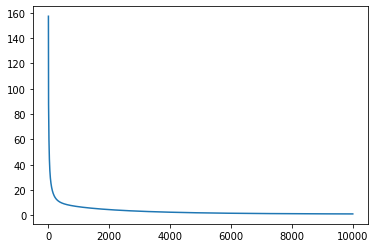

In [56]:
# 1000 .1 .94
# 1000 .001 80
# 10000 .01 .94
# 10000 .1  .99
iteration_array1=[]
final_cost_array1=[]


from sklearn.metrics import r2_score
Q_got=np.random.rand(261,1)

Q_got,iteration_array1,final_cost_array1  = linear_regression(10000,.1,Q_got,len(data_without_label))

prediction = test_data_without_label.dot(Q_got)
# r2_score( train_label, prediction)

# r2_score( train_label, prediction)
print("MSE:-",mean_squared_error(prediction,test_label))
print("rsquare:-",r2_score(test_label,prediction))
fig, ax = plt.subplots()
ax.plot(iteration_array1, final_cost_array1)
plt.show()


**Mean Absolute Percentage Error**

In [0]:
# import numpy as np

# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(test_label), np.array(prediction)
#     return np.mean(np.abs((test_label - prediction) / test_label)) * 100

In [0]:
#code taken from 
#https://stackoverflow.com/questions/47648133/mape-calculation-in-python


def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [72]:
mean_absolute_percentage_error(test_label,prediction)

61.899538686839264

**mean_absolute_error**

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_label, prediction)

1.065976032202887